## Heart Disease Analysis

#### In general, total cholesterol over 240 mg/dl is considered “high” (and therefore unhealthy).

Question: 
1. 
Do people with heart disease have high cholesterol levels on average (greater than or equal to 240 mg/dl)? 

Hypothesis:

 - `Null: People with heart disease have an average cholesterol level equal to 240 mg/dl`  
 - `Alternative: People with heart disease have an average cholesterol level that is greater than 240 mg/dl`
 
 <font color="red"> note: greater than 240 mg/dl(One tail Test/ 1 side P-value)</font>



Task:
1. Check if high cholesterol level is related to heart disease

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from scipy.stats import binom_test
import seaborn as sns


In [4]:
heart = pd.read_csv('heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


### `Seperate the data for with heart disease and without heart disease`

In [7]:
# with heart disease
yes_hd = heart[heart.heart_disease == 'presence']

In [8]:
# without heart disease
no_hd = heart[heart.heart_disease == 'absence']

# With Heart Disease

### `Creating record with heart disease and their colesterol level`

In [9]:
# w/ hd and cholesterol level
chol_hd = yes_hd.chol
# chol_hd

### `Average cholesterol level for patients who were diagnosed with heart disease`

In [10]:
chol_hd_mean = np.mean(chol_hd)
chol_hd_mean

251.4748201438849

### `Testing the hypothesis`

In [11]:
# (One tail Test/ 1 side P-value / Greater than
tstat, pval = ttest_1samp(chol_hd, 240) 
pval / 2

0.0035411033905155707

### `Ploting a histogram and check whether the values are (approximately) normally distributed`

red line = observed mean

green line = null mean

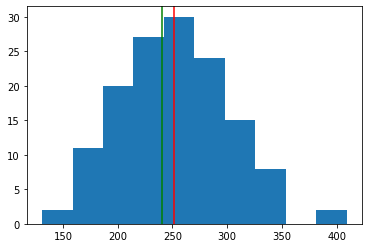

In [12]:
plt.hist(chol_hd)
plt.axvline(240, color = 'g')
plt.axvline(251, color = 'r')
plt.show()

`Our observe mean is greater than our null hypothesis`

`We will reject our null hypothesis`


### `Confidence Interval`

In [34]:
# np.percentile(chol_hd, [0,95]) For checking....


### <font color="green">Patients with heart disease average cholesterol level is greather than 240</font>

# Without Heart Disease

### `Creating record without heart disease and their colesterol level`

In [56]:
# witout hd and cholesterol level
chol_no_hd = no_hd.chol 
# chol_no_hd

### `Average cholesterol level for patients who were diagnosed without heart disease`

In [57]:
chol_no_hd_mean = np.mean(chol_no_hd)
chol_no_hd_mean

242.640243902439

### `Testing the hypothesis`

In [43]:
# (One tail Test/ 1 side P-value / Greater than
tstat, pval = ttest_1samp(chol_no_hd, 240) 
pval / 2

0.26397120232220506

### `Ploting a histogram and check whether the values are (approximately) normally distributed`

red line = observed mean

green line = null mean

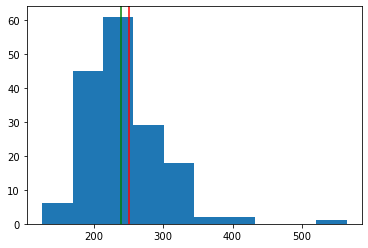

In [44]:
plt.hist(chol_no_hd)
plt.axvline(240, color = 'g')
plt.axvline(251, color = 'r')
plt.show()

There a few who has no heart disease but has a high cholesterol level

In [26]:
# checking that particular outliers
outliers = heart[heart['chol'] > 500]
outliers

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
152,67.0,female,115.0,564.0,non-anginal pain,0.0,0.0,160.0,absence


### `Note: Should we remove our outliers?`


chol_no_hd = no_hd.chol 

In [60]:
chol_no_hd = no_hd[no_hd['chol'] < 500].chol
# chol_no_hd

In [63]:
chol_no_hd_mean = np.mean(chol_no_hd)
# chol_no_hd_mean

In [64]:
# (One tail Test/ 1 side P-value / Greater than
tstat, pval = ttest_1samp(chol_no_hd, 240) 
pval / 2

0.42843935222288543

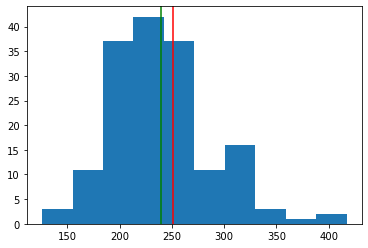

In [65]:
plt.hist(chol_no_hd)
plt.axvline(240, color = 'g')
plt.axvline(251, color = 'r')
plt.show()

### `Accept the null hypothesis`


# Conclusion

### <font color="green"> 1. Patients with heart disease average cholesterol level is greather than 240</font>

### <font color="green"> 2. Patient without heart disease has an average cholesterol level of 240</font>

### <font color="green"> 3. High cholesterol is related to heart disease</font>

## EXTRA'S
relation between binomial and quantitative

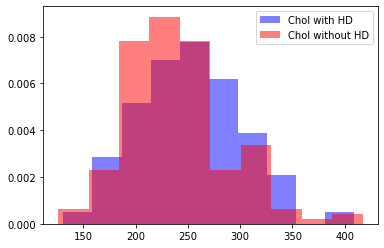

In [67]:
plt.hist(chol_hd, color="blue", label="Chol with HD", density=True, alpha=0.5)
plt.hist(chol_no_hd, color="red", label="Chol without HD", density=True, alpha=0.5)
plt.legend()
plt.show()

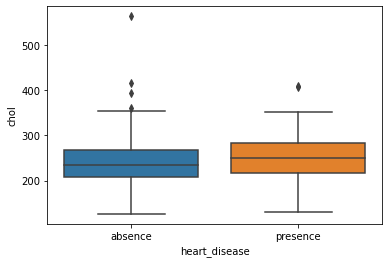

In [70]:
sns.boxplot(data = heart, x = 'heart_disease', y = 'chol')
plt.show()

# Fasting Blood Sugar Analysis

Binomial:

is there a fix number of trials?		
are there only two possible outcomes?		
are the outcomes independent to eash other?		
does the probability of success remain the same for each trial?		


Sometimes, `part of an analysis will involve comparing a sample to known population values to see if the sample appears to be representative of the general population.`

By some estimates, about 8% of the U.S. population had diabetes (diagnosed or undiagnosed) in 1988 when this data was collected. While there are multiple tests that contribute to a diabetes diagnosis, fasting blood sugar levels greater than 120 mg/dl can be indicative of diabetes (or at least, pre-diabetes). If this sample were representative of the population, approximately how many people would you expect to have diabetes? 

Question:

Is this value similar to the number of patients with a resting blood sugar above 120 mg/dl — or different?

Is our sample, is it part of the U.S population where 8% had diabetes?

Hypothesis:
- `Null` : This sample was drawn from a population where 8% of people have fasting blood sugar > 120 mg/dl
- `Alternative` : This sample was drawn from a population where more than 8% of people have fasting blood sugar > 120 mg/dl

`Details:`

fbs: 
  - 1 =  FBS levels greater than 120 mg/dl
  -  2 =  FBS levels equal to or less than 120 mg/dl

In [86]:
# FBS levels greater than 120 mg/dl can be indicative of diabetes (or at least, pre-diabetes).
# getting the number of patients FBS greater than 120 
num_diabetes = np.sum(heart.fbs == 1)
num_diabetes

45

In [91]:
# nummer of patients
num_patients = len(heart)
num_patients

303

In [93]:
p_value = binom_test(num_diabetes, n=num_patients, p=0.08, alternative = 'greater')
p_value

4.689471951449078e-05

0.0000469


### `This is less than 0.05, indicating that this sample likely comes from a population where more than 8% of `

### `people have fbs > 120 mg/dl.`